Этот набор данных содержит образцы текста,
маркированные для распознания ИИ и текста, написанного человеком,
с подробными лингвистическими и стилистическими признаками,
извлеченными из каждого образца.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

path="C:/Users/eugen/PycharmProjects/PythonProject4/ai_human_content_detection_dataset.csv"
datafile = pd.read_csv(path)

Вывод информации о датасете: размер, первые и последние 5 строк

In [21]:
print(datafile.shape)

pd.set_option('display.max_columns', None)

print(datafile.head())
print(datafile.tail())

(1367, 17)
                                        text_content      content_type  \
0  Score each cause. Quality throughout beautiful...    academic_paper   
1  Board its rock. Job worker break tonight coupl...             essay   
2  Way debate decision produce. Dream necessary c...    academic_paper   
3  Story turn because such during open model. Tha...  creative_writing   
4  Place specific as simply leader fall analysis....      news_article   

   word_count  character_count  sentence_count  lexical_diversity  \
0         288             1927              54             0.9514   
1         253             1719              45             0.9723   
2         420             2849              75             0.9071   
3         196             1310              34             0.9592   
4         160             1115              28             0.9688   

   avg_sentence_length  avg_word_length  punctuation_ratio  \
0                 5.33             5.69             0.0280   
1    

In [22]:
# В наборе данных представлены тексты и определенные характеристики. Текст дифференцирован
# по типу. Признаки текста имеют имена:
# content_type - тип текста(academic_paper, news_article, blog_post, creative_writing
#   article, essay, social_media, product_review)
# word_count - число слов
# character_count - число символов
# sentence_count - число предложений
# lexical_diversity - лексическое разнообразие(словарный запас)
# avg_sentence_length - средняя длина предложения
# avg_word_length - средняя длина слова
# punctuation_ratio - соотношение знаков пунктуации
# flesch_reading_ease - легкость восприятия текста
# gunning_fog_index - сложность понимания текста
# grammar_errors - грамматические ошибки
# passive_voice_ratio - коэффициент пассивного залога
# predictability_score - индекс предсказуемости
# burstiness - коэффициент чередования длинных и коротких предложений
# sentiment_score - эмоциональная окраска
# label - бинарный признак, показывающий, написан текст человеком или сгенерирован ии
# Задача по признакам предугадать, написан текст человеком (label = 1) или
# сгенерирован ии (label = 0)
# label - бинарный признак, content_type - категориальный, остальные признаки числовые

In [23]:
print(datafile.columns)

Index(['text_content', 'content_type', 'word_count', 'character_count',
       'sentence_count', 'lexical_diversity', 'avg_sentence_length',
       'avg_word_length', 'punctuation_ratio', 'flesch_reading_ease',
       'gunning_fog_index', 'grammar_errors', 'passive_voice_ratio',
       'predictability_score', 'burstiness', 'sentiment_score', 'label'],
      dtype='object')


Изменим тип категориального признака

In [24]:
datafile['content_type'] = datafile['content_type'].astype('category')

print(datafile.describe(include=['category']))

          content_type
count             1367
unique               8
top     academic_paper
freq               189


Разведочный анализ данных

Информация о количественных признаках датасета

In [25]:
print(datafile.describe())

        word_count  character_count  sentence_count  lexical_diversity  \
count  1367.000000      1367.000000     1367.000000        1367.000000   
mean    140.190929       940.329188       25.610095           0.967646   
std      97.410218       654.335255       17.867480           0.026254   
min       3.000000        14.000000        1.000000           0.875000   
25%      61.500000       410.500000       11.000000           0.951550   
50%     131.000000       882.000000       24.000000           0.969200   
75%     193.000000      1294.500000       35.000000           0.989100   
max     443.000000      2966.000000       83.000000           1.000000   

       avg_sentence_length  avg_word_length  punctuation_ratio  \
count          1367.000000      1367.000000        1367.000000   
mean              5.486423         5.717783           0.027440   
std               0.447202         0.279636           0.002801   
min               3.000000         4.000000           0.019400   
25%

Обработка выбросов

Для обработки выбросов построим всевозможные зависимости между количественными и категориальными признаками

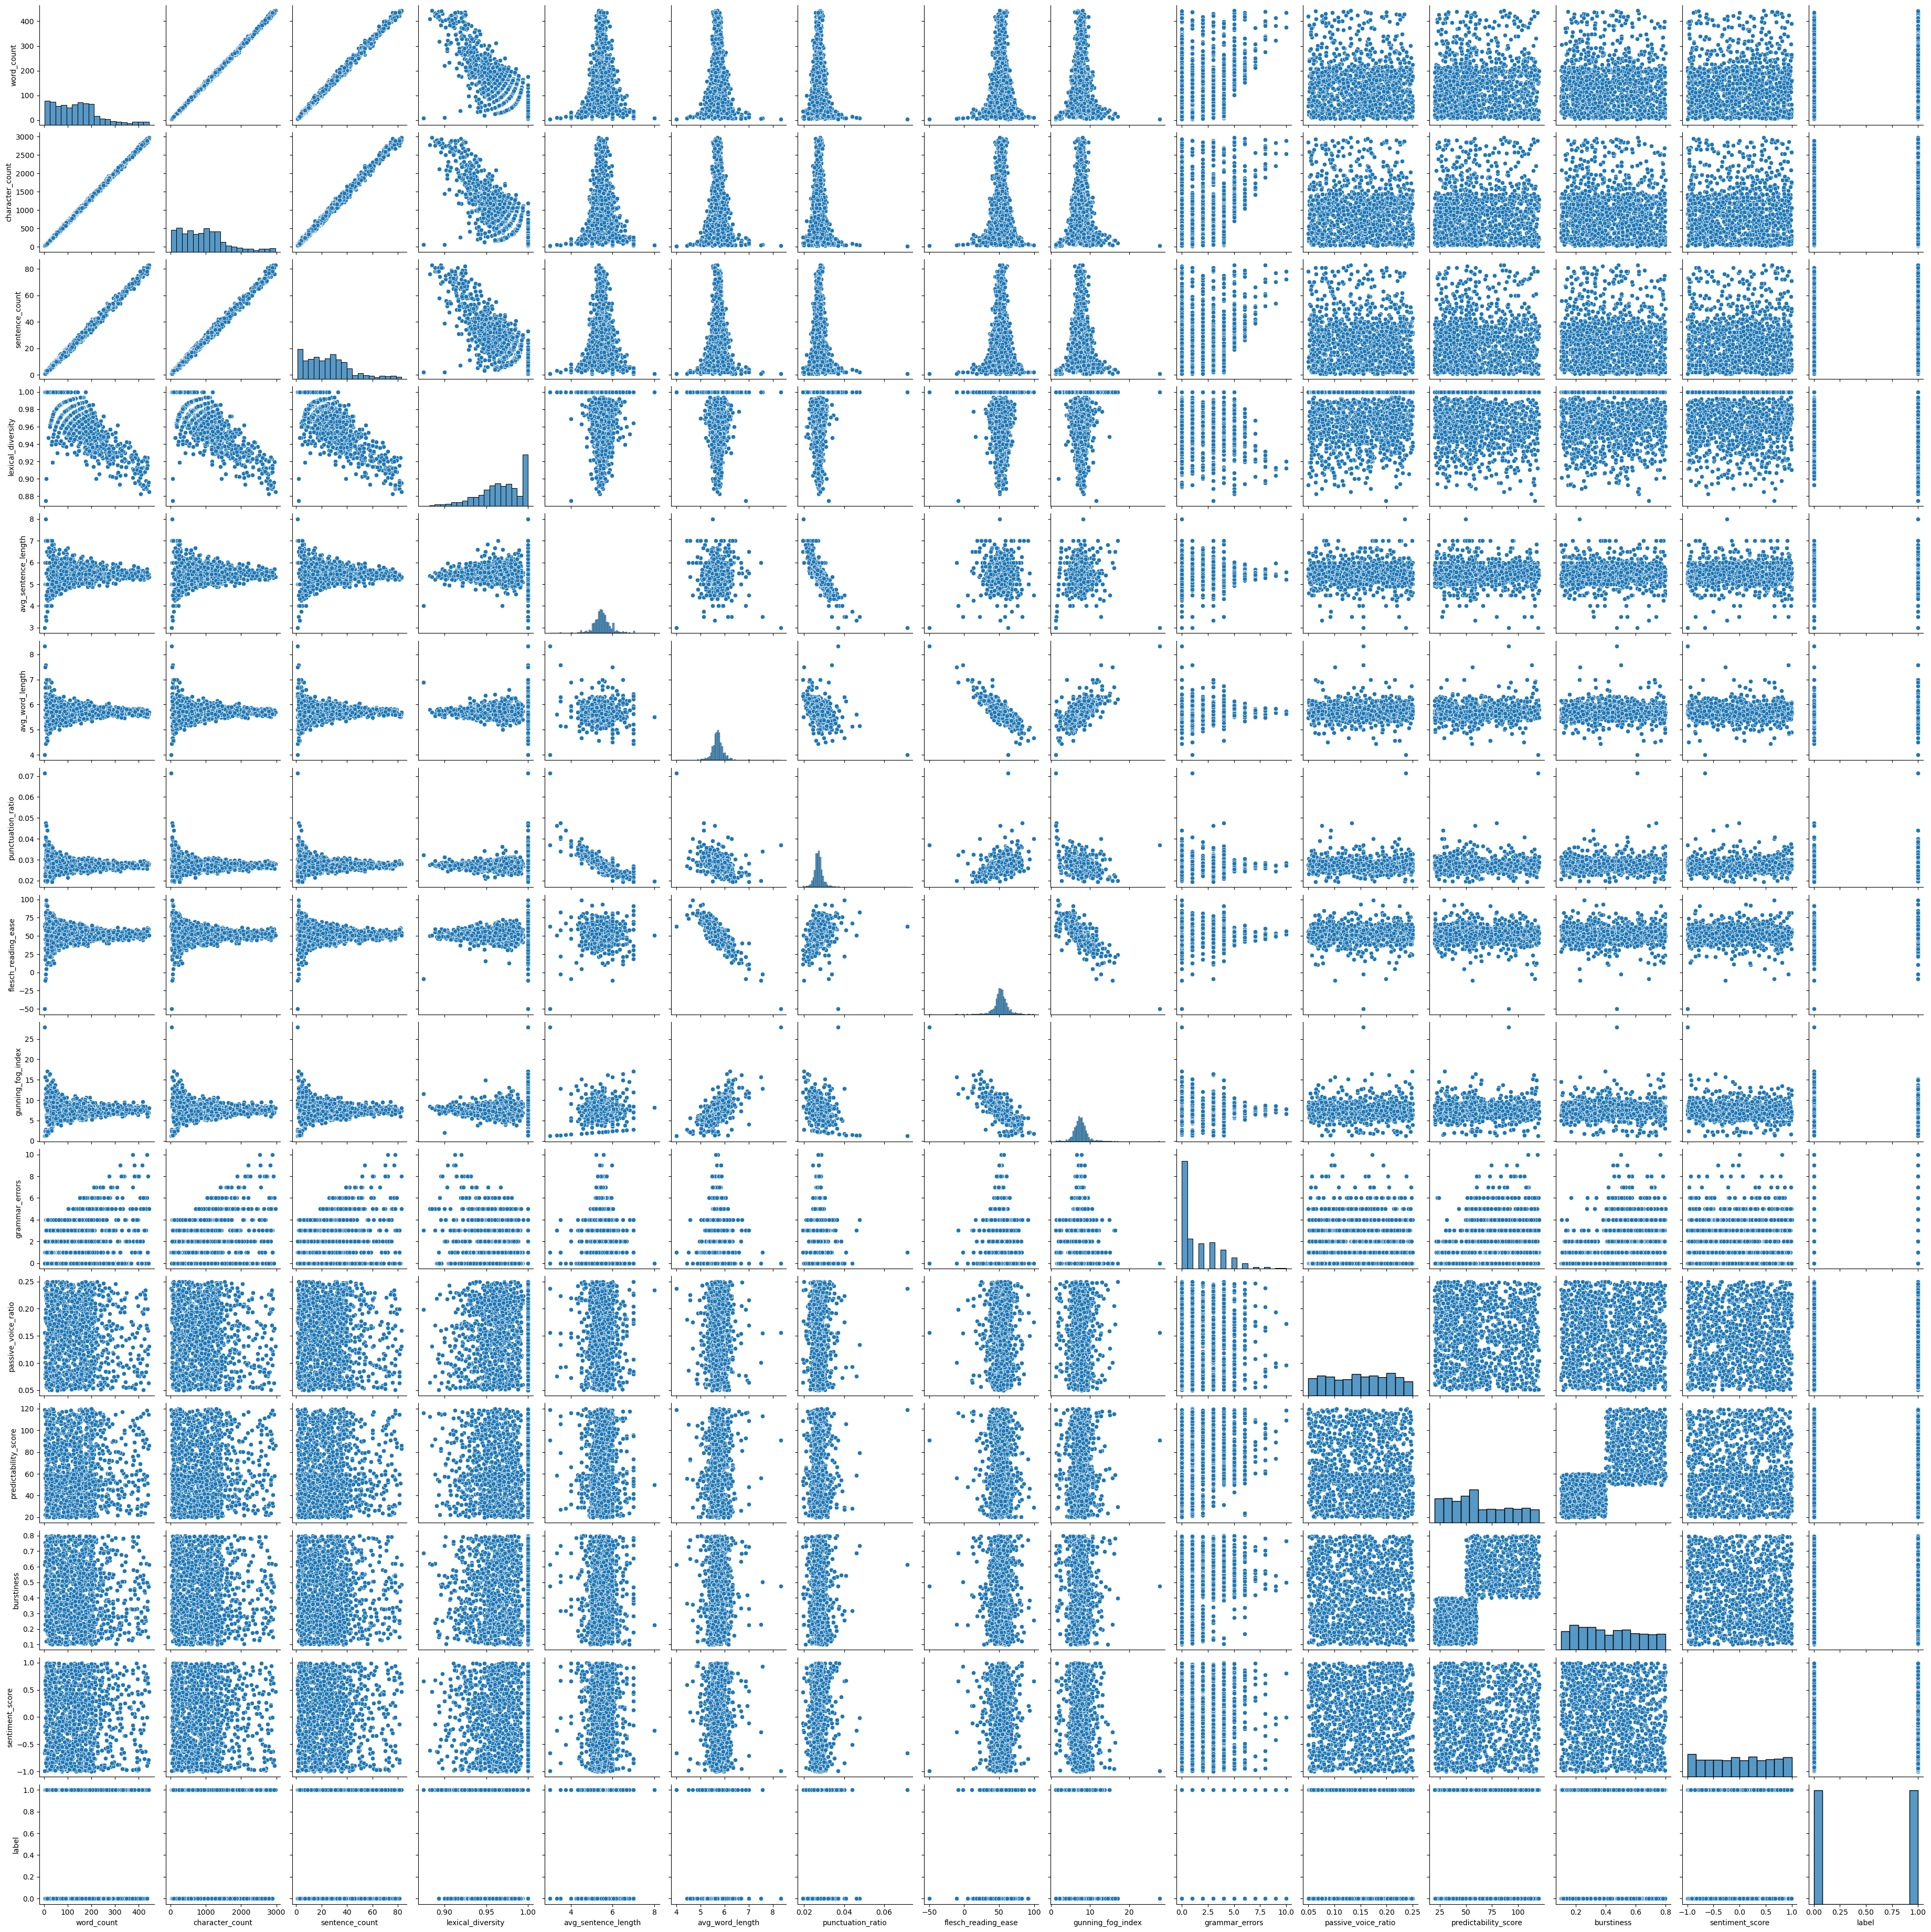

In [26]:
sns.pairplot(datafile.drop(columns=["text_content", "content_type"]))
plt.show()

Из полученных графиков можно обнаружить выбросы по полям: 'avg_sentence_length' 'avg_word_length',
'punctuation_ratio', 'flesch_reading_ease' и 'gunning_fog_index'
Обработка выбросов:

In [27]:
rows_to_drop = datafile[(datafile['avg_sentence_length'] < datafile['avg_sentence_length'].quantile(0.001)) |
                        (datafile['avg_sentence_length'] > datafile['avg_sentence_length'].quantile(0.999)) |
                        (datafile['avg_word_length'] < datafile['avg_word_length'].quantile(0.001)) |
                        (datafile['avg_word_length'] > datafile['avg_word_length'].quantile(0.999)) |
                        (datafile['punctuation_ratio'] < datafile['punctuation_ratio'].quantile(0.001)) |
                        (datafile['punctuation_ratio'] > datafile['punctuation_ratio'].quantile(0.999)) |
                        (datafile['flesch_reading_ease'] < datafile['flesch_reading_ease'].quantile(0.001)) |
                        (datafile['flesch_reading_ease'] > datafile['flesch_reading_ease'].quantile(0.999)) |
                        (datafile['gunning_fog_index'] < datafile['gunning_fog_index'].quantile(0.001)) |
                        (datafile['gunning_fog_index'] > datafile['gunning_fog_index'].quantile(0.999))
                        ].index
datafile.drop(rows_to_drop, inplace=True)
print(datafile.shape)

(1354, 17)


Обработка пропущенных значений:
значения пропущены в полях flesch_reading_ease, gunning_fog_index, gunning_fog_index и sentiment_score.
Ввиду небольшого размера набора данных - 1354 записи, сохраним строки с пропущенными значениями и
заполним пропущенные поля средним, так как пропуски только в количественных признаках.

In [28]:
print(datafile.isna().sum())
datafile['flesch_reading_ease'].fillna(datafile['flesch_reading_ease'].mean(), inplace=True)
datafile['gunning_fog_index'].fillna(datafile['gunning_fog_index'].mean(), inplace=True)
datafile['passive_voice_ratio'].fillna(datafile['passive_voice_ratio'].mean(), inplace=True)
datafile['sentiment_score'].fillna(datafile['sentiment_score'].mean(), inplace=True)
print(datafile.isna().sum())

text_content             0
content_type             0
word_count               0
character_count          0
sentence_count           0
lexical_diversity        0
avg_sentence_length      0
avg_word_length          0
punctuation_ratio        0
flesch_reading_ease     79
gunning_fog_index       35
grammar_errors           0
passive_voice_ratio     31
predictability_score     0
burstiness               0
sentiment_score         53
label                    0
dtype: int64
text_content            0
content_type            0
word_count              0
character_count         0
sentence_count          0
lexical_diversity       0
avg_sentence_length     0
avg_word_length         0
punctuation_ratio       0
flesch_reading_ease     0
gunning_fog_index       0
grammar_errors          0
passive_voice_ratio     0
predictability_score    0
burstiness              0
sentiment_score         0
label                   0
dtype: int64


Исследуем данные на предмет несбалансированности. Для этого построим график числа вхождений всех значений
категориального признака 'content_type'

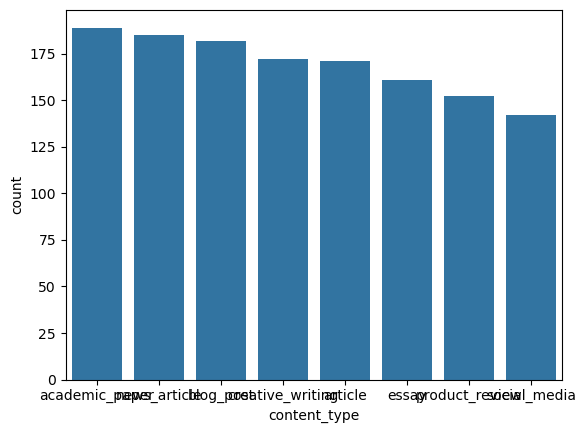

In [29]:
sns.countplot(x='content_type', order=datafile['content_type'].value_counts().index, data=datafile)
plt.show()

и график числа вхождений целевого признака

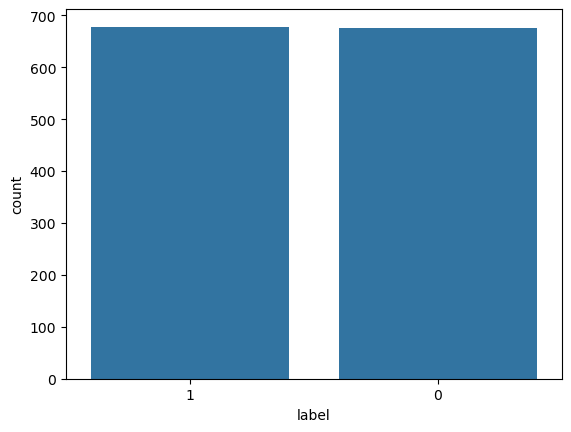

In [30]:
sns.countplot(x='label', order=datafile['label'].value_counts().index, data=datafile)
plt.show()

Можно видеть, что число вхождений 'social_media' существенно меньше числа вхождений остальных значений.
Данные в 'label' сбалансированы

Матрица корреляции

In [31]:
corr_matrix = datafile.corr(numeric_only=True)
print(corr_matrix)

                      word_count  character_count  sentence_count  \
word_count              1.000000         0.999369        0.997223   
character_count         0.999369         1.000000        0.996731   
sentence_count          0.997223         0.996731        1.000000   
lexical_diversity      -0.827740        -0.828041       -0.823582   
avg_sentence_length    -0.000683        -0.002479       -0.051761   
avg_word_length        -0.006321         0.017820       -0.002820   
punctuation_ratio      -0.085270        -0.094181       -0.040972   
flesch_reading_ease    -0.017185        -0.036247       -0.015354   
gunning_fog_index       0.027189         0.041162        0.022082   
grammar_errors          0.336411         0.336627        0.334917   
passive_voice_ratio    -0.050389        -0.049585       -0.048662   
predictability_score    0.014775         0.013981        0.012580   
burstiness             -0.022230        -0.022962       -0.022943   
sentiment_score        -0.008744  

Визуализация корреляционной зависимости

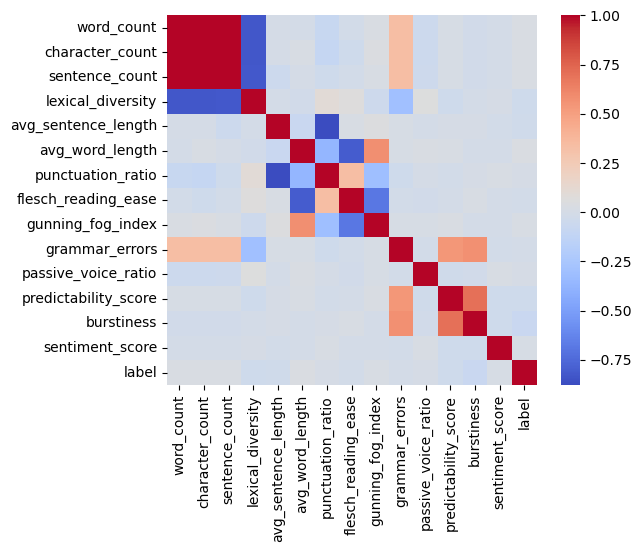

In [32]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
plt.show()

Можно обратить внимание на высокую корреляцию между 'word_count', 'character_count' и 'sentence_count'.
Также сильно коррелируют 'grammar_errors', 'predictability_score' и 'burstiness'.
Есть отделенная от нуля зависимость между 'grammar_errors' и такими признаками, как 'avg_sentence_length',
'word_count' и 'character_count'. Сильная обратная зависимость между 'lexical_diversity' и признаками:
'word_count', 'character_count' и 'sentence_count'. Сильная обратная зависимость наблюдается между 'punctuation_ratio'
и 'avg_sentence_length'. Сильная отрицательная корреляция между 'flesch_reading_ease'
и 'avg_word_length'. Также сильная обратная корреляция между 'gunning_fog_index' и 'flesch_reading_ease'.
Сильно коррелированные признаки можно исключить, ввиду того, что они дают модели одну и ту же информацию

In [33]:
datafile = datafile.drop(['character_count', 'sentence_count', 'grammar_errors',
                          'lexical_diversity', 'avg_sentence_length', 'flesch_reading_ease'], axis=1)

Бинаризация категориальных признаков

Единственный категориальный признак - content_type. Вместо него используем 8 новых признаков:
academic_paper, news_article, blog_post, creative_writing, article, essay, social_media, product_review

In [34]:
content_type_dummies = pd.get_dummies(datafile['content_type'])
print(content_type_dummies.head())

   academic_paper  article  blog_post  creative_writing  essay  news_article  \
0            True    False      False             False  False         False   
1           False    False      False             False   True         False   
2            True    False      False             False  False         False   
3           False    False      False              True  False         False   
4           False    False      False             False  False          True   

   product_review  social_media  
0           False         False  
1           False         False  
2           False         False  
3           False         False  
4           False         False  


Добавляем новые признаки в таблицу. Удаляем столбцы 'content_type' и 'text_content'

In [35]:
datafile = pd.concat((datafile, content_type_dummies), axis=1)
datafile = datafile.drop(['content_type'], axis=1)
datafile = datafile.drop(['text_content'], axis=1)

Отбор признаков

Так как признак 'label' слабо коррелирует со всеми остальными признаками, будем использовать все поля для
классификации.
Разобьем данные на обучающую и тестовую выборки в соотношении 3:1.

In [36]:
X = datafile.drop(['label'], axis=1)
y = datafile['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Нормализация данных

Так как метод k ближайших соседей чувствителен к ненормализованным данным применим стандартизацию.
Чувствительность метода обусловлена использованием расстояния между объектами

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1015, 16) (1015,) (339, 16) (339,)


Тренировка модели

In [ ]:
Используем метод k ближайших соседей при k = 5 и используя евклидову метрику

In [40]:
model = KNeighborsClassifier(n_neighbors=5, p = 2)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

Вывод ошибки

In [42]:
np.mean(y_test != y_test_predict)

np.float64(0.4837758112094395)

In [43]:
np.mean(y_train != y_train_predict)

np.float64(0.31822660098522165)

Подберем оптимальное k

In [46]:
min_test = np.mean(y_test != y_test_predict)
min_train = np.mean(y_train != y_train_predict)
optimal_steps = 5

test_means = []
train_means = []
steps = []

for neighbor in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=neighbor, p=2)
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    if min_test > np.mean(y_test != y_test_predict):
        optimal_steps = neighbor
    min_test = min(min_test, np.mean(y_test != y_test_predict))
    min_train = min(min_train, np.mean(y_train != y_train_predict))
    test_means.append(np.mean(y_test != y_test_predict))
    train_means.append(np.mean(y_train != y_train_predict))
    steps.append(neighbor)
print("Оптимальное число ближайших соседей", optimal_steps)
print("Ошибка на тесте", min_test)

Оптимальное число ближайших соседей 14
Ошибка на тесте 0.45722713864306785


Визуализируем полученные данные

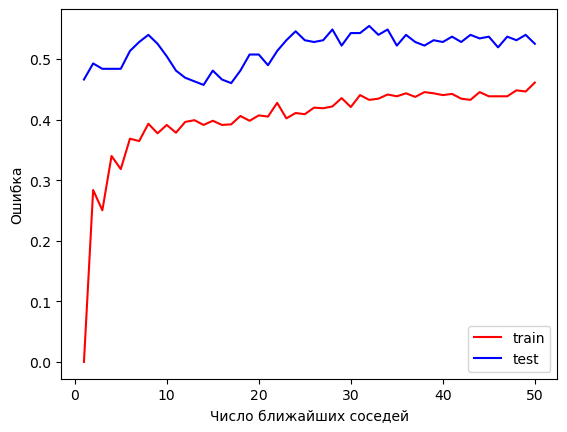

In [47]:
plt.plot(steps, train_means, 'r', label='train')
plt.plot(steps, test_means, 'b', label='test')
plt.xlabel('Число ближайших соседей')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Величина ошибки может быть обусловлена несбалансированностью признака 'content_type'.

Для борьбы с несбалансированностью воспользуемся методом ансамблирования моделей

In [53]:
rf_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_train_predict = rf_model.predict(X_train)
rf_test_predict = rf_model.predict(X_test)

rf_train_error = 1 - accuracy_score(rf_train_predict, y_train)
rf_test_error  = 1 - accuracy_score(rf_test_predict, y_test)

print("Ошибка на тесте: ", np.sqrt(rf_test_error))

Ошибка на тесте:  0.7081489435519107


Ошибка возросла

Проведем LDA

In [54]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

lda_train_score = lda_model.score(X_train, y_train)
lda_test_score = lda_model.score(X_test, y_test)

Результаты LDA

In [56]:
lda_test_error = np.mean(lda_test_predict != y_test)
lda_train_error = np.mean(lda_train_predict != y_train)
print("Ошибка на тесте: ", lda_test_error)

Ошибка на тесте:  0.4778761061946903


Ошибка больше, чем у метода ближайших соседей

После обработки данных не получилось достичь малых значений ошибок на любых методах. Рекордное значение ошибки,
равное 0.45722713864306785 достигается при использовании метода 14-х ближайших соседей. Метод ближайших
соседей достигает рекорда точности по причине небольшого размера датасета. Причины большого значения
ошибки могут крыться в малом размере датасета, большом количестве и плохом наборе признаков